### Clasificacion con scikit-learn

In [1]:
# librerias data wrangling
import pandas as pd
import numpy as np
import bamboolib as bam

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

#remueve limite de lineas y columnas mostradas
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# limita el numero de cifras significativas a 2, esto elimina la presentacion en exponencial
pd.options.display.float_format = '{:.0f}'.format



### Importar dataframe

In [2]:
# importacion del data frame
import pandas as pd
df = pd.read_csv(r'C:\Users\GTESSADA\Documents\Data Science\Coder House\churn_telco_v2\WA_Fn-UseC_-Telco-Customer-Churn.csv', sep=',', decimal=',')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes


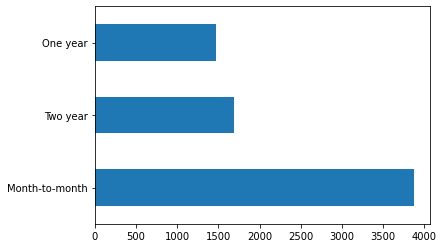

In [3]:
# grafico variable'Contract' 
df.Contract.value_counts(normalize=False).plot.barh()
plt.show()

### Informacion dataframe

In [3]:
# informacion del data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7043 non-null   object
 1   gender            7043 non-null   object
 2   SeniorCitizen     7043 non-null   int64 
 3   Partner           7043 non-null   object
 4   Dependents        7043 non-null   object
 5   tenure            7043 non-null   int64 
 6   PhoneService      7043 non-null   object
 7   MultipleLines     7043 non-null   object
 8   InternetService   7043 non-null   object
 9   OnlineSecurity    7043 non-null   object
 10  OnlineBackup      7043 non-null   object
 11  DeviceProtection  7043 non-null   object
 12  TechSupport       7043 non-null   object
 13  StreamingTV       7043 non-null   object
 14  StreamingMovies   7043 non-null   object
 15  Contract          7043 non-null   object
 16  PaperlessBilling  7043 non-null   object
 17  PaymentMethod 

### Preparacion datos dataframe
 * las variables 'MonthlyCharges' y 'TotalCharges' son importadas como tipo object, en realidad son numericas, por lo tanto se transforman


In [4]:
# trasfomacion object a float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], downcast='float', errors='coerce')
df['MonthlyCharges']=pd.to_numeric(df['MonthlyCharges'], downcast='float', errors='coerce')

In [9]:
# normalizacion de las variables 'TotalCharges' y 'MonthlyCharges' en float64
df = df.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

#### Resultado transformacion

In [10]:
#verifica trasformacion object to float 'TotalCharges', 'MonthlyCharges'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Casteo en minusculas de los nombres de las variables (columnas)

In [11]:
# nombres columnas en minusculo
df=df.rename(columns=str.lower)

#### Resultado transformacion minusculas

In [12]:
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

### Estadisticos base del data frame
* Nota: se consideran tanto las variables numericas cuanto las variables categoricas

In [13]:
# estadisticos basicos para variables numericas y categoricas
#df.describe()
df.describe(include='all')

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,NaN,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,NaN,5174
mean,NaN,NaN,0,NaN,NaN,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65,2280,NaN
std,NaN,NaN,0,NaN,NaN,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30,2267,NaN
min,NaN,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,0,NaN
25%,NaN,NaN,0,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,399,NaN
50%,NaN,NaN,0,NaN,NaN,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70,1395,NaN
75%,NaN,NaN,0,NaN,NaN,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90,3787,NaN


## Classification Tree

#### Vista dataframe

In [14]:
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,30,30,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,57,1890,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,54,108,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42,1841,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,71,152,Yes


#### Dataframe variable dependiente o variable a predecir
* Nota: 'churn' es nuestra variable a predecir

In [15]:
# crear data frame con solo la variable a predecir (variable dependiente o target) 'Churn'
y=df['churn']
y.head()
#y.shape

0     No
1     No
2    Yes
3     No
4    Yes
Name: churn, dtype: object

#### Dataframe variable independientes o variable a predictoras
* Nota: se elimna la variable a predecir y las variables que no son predictoras como el 'customerid'

In [16]:
#crear data frame con solo las variables independientes, se elimina la variable dependiente 'Churn' y la variable 'CustomerID'
x = df.drop(columns=['churn','customerid'],axis=1) #axis=0 lineas; axis=1 columnas
x.head()
#x.shape

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,30,30
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,57,1890
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,54,108
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42,1841
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,71,152


#### Encoding de las variables categoricas del dataframe de variables indipendientes 'x'

In [17]:
# encoding de las variables categoricas
x = pd.get_dummies(x, prefix_sep='_', drop_first=True) #uso de la funcion get_dummies de pandas
x.head()

,seniorcitizen,tenure,monthlycharges,totalcharges,gender_Male,partner_Yes,dependents_Yes,phoneservice_Yes,multiplelines_No phone service,multiplelines_Yes,internetservice_Fiber optic,internetservice_No,onlinesecurity_No internet service,onlinesecurity_Yes,onlinebackup_No internet service,onlinebackup_Yes,deviceprotection_No internet service,deviceprotection_Yes,techsupport_No internet service,techsupport_Yes,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No internet service,streamingmovies_Yes,contract_One year,contract_Two year,paperlessbilling_Yes,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,0,1,30,30,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,34,57,1890,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,0,2,54,108,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,45,42,1841,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,0,2,71,152,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


### Modelo Clasification Tree

#### Separacion de los dataframe 'y' y 'x' en training y test
* 'test_size' se indica el porcentaje del dataframe total que se usara como test
* 'ranndom_state' se aplica una semilla para que sea repetible el experimento

In [18]:
# se usa el modulo 'train_test_split' para dividir los data frame en training y test
from sklearn.model_selection import train_test_split
# se crea un data frame de test del 30% del total del data set el resto se usara para training
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3,random_state = 42) 

In [19]:
print('Dimension de X_train',X_train.shape)

Dimension de X_train (4930, 30)


In [20]:
print('Dimension de y_train',y_train.shape)

Dimension de y_train (4930,)


In [21]:
print('Dimension de X_test',X_test.shape)

Dimension de X_test (2113, 30)


In [22]:
print('Dimension de y_test',y_test.shape)

Dimension de y_test (2113,)


#### Importar paquete modelo  DecisionTreeClassifier

In [23]:
#libreria modelo arbol de decision
from sklearn.tree import DecisionTreeClassifier

#### Crear modelo Classification Tree
* 'max_depth': indica el numero de suddividisiones
*  'ranndom_state' se aplica una semilla para que sea repetible el experimento

In [24]:
# nombre modelo de clasificicacion
# max_depth maxima profundidad de las particiones; random_state en modo que a nuevas ejecuciones entregue la misma respuesta
clf_decision_tree_telco_churn = DecisionTreeClassifier(max_depth =5, random_state = 42)


#### Entrenamiento del modelo Classification Tree con los datos de training
* 'X_train'
* 'y_train'

In [25]:
# se ejecuta modelo de clasificacion sobre los data set de entrenamiento                                        
clf_decision_tree_telco_churn.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

### Grafico del modelo Classification Tree

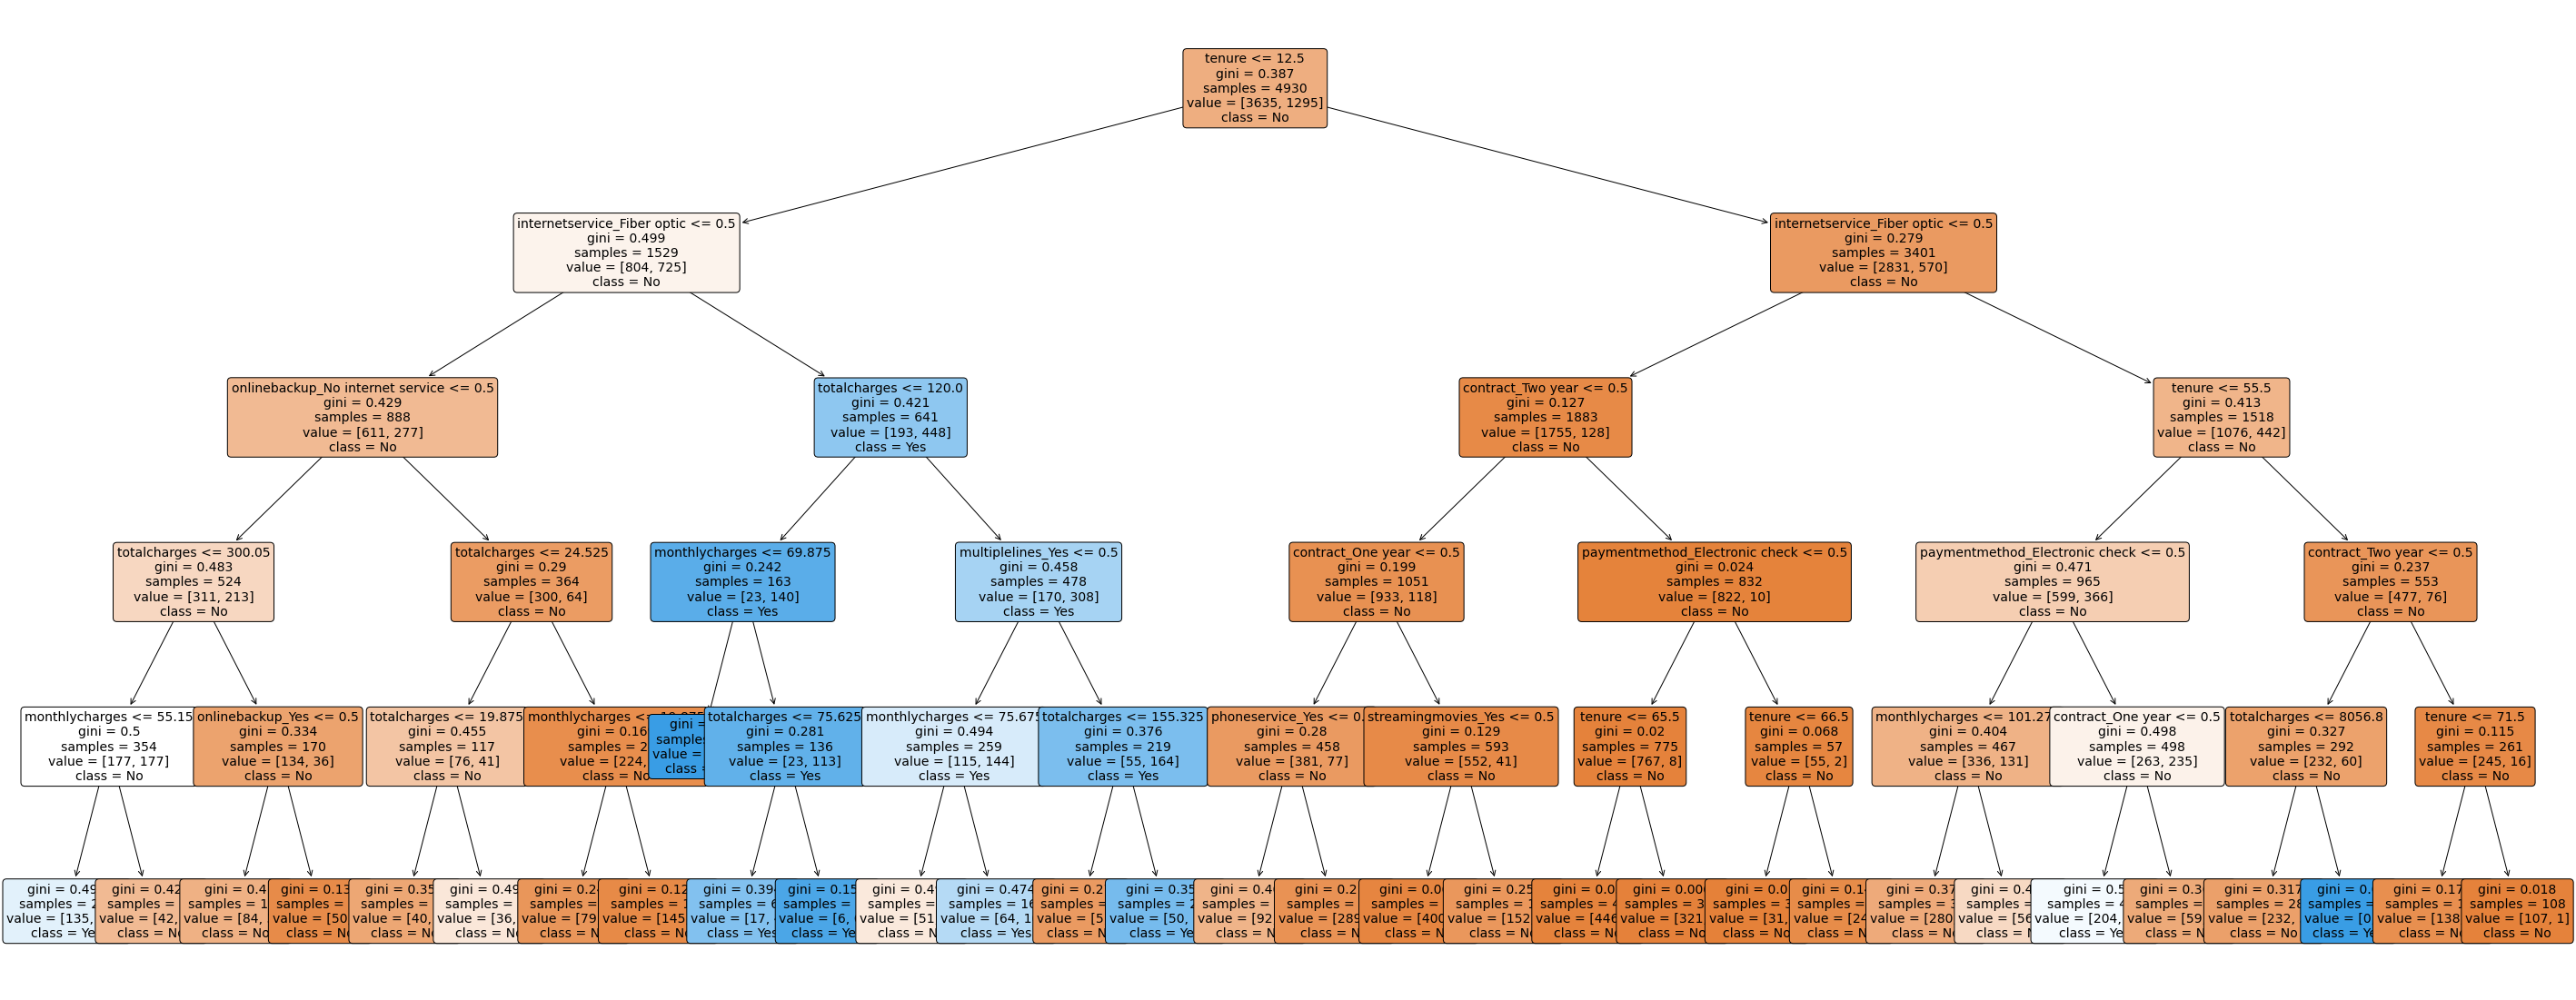

In [26]:
#extract feature names
feature_names = x.columns
#extract as a list for use later as well
features = list(x.columns)
#extract labels
labels = y.unique()
from sklearn import tree # funcion que permite graficar el arbol de decision
#plt the figure, setting a black background
plt.figure(figsize=(50,20), facecolor ='w')
#create the tree plot
a = tree.plot_tree(clf_decision_tree_telco_churn,
                   #use the feature names stored
                   feature_names = feature_names,
                   #use the class names stored
                   class_names = labels,
                   rounded = True,
                   filled = True,
                   fontsize=14)
#show the plot
plt.show()

#### Reglas de particion

In [28]:
from sklearn.tree import export_text
tree_rules = export_text(clf_decision_tree_telco_churn,feature_names = features)
print(tree_rules)

|--- tenure <= 12.50
|   |--- internetservice_Fiber optic <= 0.50
|   |   |--- onlinebackup_No internet service <= 0.50
|   |   |   |--- totalcharges <= 300.05
|   |   |   |   |--- monthlycharges <= 55.15
|   |   |   |   |   |--- class: Yes
|   |   |   |   |--- monthlycharges >  55.15
|   |   |   |   |   |--- class: No
|   |   |   |--- totalcharges >  300.05
|   |   |   |   |--- onlinebackup_Yes <= 0.50
|   |   |   |   |   |--- class: No
|   |   |   |   |--- onlinebackup_Yes >  0.50
|   |   |   |   |   |--- class: No
|   |   |--- onlinebackup_No internet service >  0.50
|   |   |   |--- totalcharges <= 24.52
|   |   |   |   |--- totalcharges <= 19.88
|   |   |   |   |   |--- class: No
|   |   |   |   |--- totalcharges >  19.88
|   |   |   |   |   |--- class: No
|   |   |   |--- totalcharges >  24.52
|   |   |   |   |--- monthlycharges <= 19.88
|   |   |   |   |   |--- class: No
|   |   |   |   |--- monthlycharges >  19.88
|   |   |   |   |   |--- class: No
|   |--- internetservice_Fibe

#### Prediccion del modelo de modelo de clasificacion con el dataframe de test 'X_test'

In [ ]:
# se aplica al dataframe de test 'X_test' el modelo entrenado
test_pred_decision_tree = clf_decision_tree_telco_churn.predict(X_test)
test_pred_decision_tree


array(['Yes', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

### Metricas del modelo Clasification tree


#### Confusion Matrix

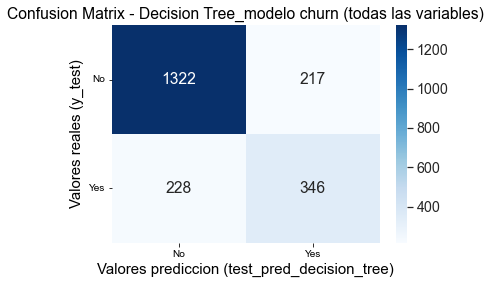

<Figure size 720x504 with 0 Axes>

In [ ]:
# se crea la matriz de confusion para el resultado del modelo aplicado al data frame de test y las etiquetas reales
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, test_pred_decision_tree)

# grafica matriz de confusion
matrix_df = pd.DataFrame(confusion_matrix)
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="Blues")

ax.set_title('Confusion Matrix - Decision Tree_modelo churn (todas las variables)')
ax.set_xticklabels(['']+labels)
ax.set_xlabel("Valores prediccion (test_pred_decision_tree)", fontsize =15)
ax.set_yticklabels(list(labels), rotation = 0)
ax.set_ylabel("Valores reales (y_test)", fontsize=15)
plt.show()
                                          

#### Precision, recall, f1-score, accuracy

In [35]:
print(metrics.classification_report(y_test,test_pred_decision_tree))

              precision    recall  f1-score   support

          No       0.85      0.86      0.86      1539
         Yes       0.61      0.60      0.61       574

    accuracy                           0.79      2113
   macro avg       0.73      0.73      0.73      2113
weighted avg       0.79      0.79      0.79      2113



## KNN Classification

#### Copia del dataframe original 'df_knn' 

In [91]:
df_knn =df
print('Dimensiones del data frame df_knn', df_knn.shape)

Dimensiones del data frame df_knn (7043, 21)


#### Vista dataframe

In [92]:
df_knn.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,30,30,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,57,1890,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,54,108,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42,1841,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,71,152,Yes


In [93]:
df_knn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


### Preparacion datos dataframe

#### Eliminar las variabels no predictoras

In [94]:
#crear data frame con solo las variables independientes, se elimina la variable dependiente 'Churn' y la variable 'CustomerID'
df_knn = df_knn.drop(columns=['customerid'],axis=1) #axis=0 lineas; axis=1 columnas
df_knn.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,30,30,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,57,1890,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,54,108,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42,1841,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,71,152,Yes


#### Encoding de las variables categoricas del dataframe df_knn

In [95]:
# encoding de las variables categoricas
df_knn = pd.get_dummies(df_knn, prefix_sep='_', drop_first=True) #uso de la funcion get_dummies de pandas
df_knn.head()

,seniorcitizen,tenure,monthlycharges,totalcharges,gender_Male,partner_Yes,dependents_Yes,phoneservice_Yes,multiplelines_No phone service,multiplelines_Yes,internetservice_Fiber optic,internetservice_No,onlinesecurity_No internet service,onlinesecurity_Yes,onlinebackup_No internet service,onlinebackup_Yes,deviceprotection_No internet service,deviceprotection_Yes,techsupport_No internet service,techsupport_Yes,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No internet service,streamingmovies_Yes,contract_One year,contract_Two year,paperlessbilling_Yes,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check,churn_Yes
0,0,1,30,30,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,0,34,57,1890,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0,2,54,108,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
3,0,45,42,1841,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
4,0,2,71,152,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1


### Modelo KNN

#### Dataframe variable dependiente o variable a predecir
* Nota: 'churn' es nuestra variable a predecir

In [96]:
# crear data frame con solo la variable a predecir (variable dependiente o target) 'Churn'
y_knn=df_knn['churn_Yes']
y_knn.head()
#y.shape

0    0
1    0
2    1
3    0
4    1
Name: churn_Yes, dtype: uint8

#### Dataframe variable independientes o variable a predictoras
* Nota: se elimna la variable a predecir y las variables que no son predictoras como el 'customerid'

In [97]:
#crear data frame con solo las variables independientes, se elimina la variable dependiente 'Churn' y la variable 'CustomerID'
x_knn = df_knn.drop(columns=['churn_Yes'],axis=1) #axis=0 lineas; axis=1 columnas
x_knn.head()
#x.shape

,seniorcitizen,tenure,monthlycharges,totalcharges,gender_Male,partner_Yes,dependents_Yes,phoneservice_Yes,multiplelines_No phone service,multiplelines_Yes,internetservice_Fiber optic,internetservice_No,onlinesecurity_No internet service,onlinesecurity_Yes,onlinebackup_No internet service,onlinebackup_Yes,deviceprotection_No internet service,deviceprotection_Yes,techsupport_No internet service,techsupport_Yes,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No internet service,streamingmovies_Yes,contract_One year,contract_Two year,paperlessbilling_Yes,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,0,1,30,30,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,34,57,1890,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,0,2,54,108,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,45,42,1841,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,0,2,71,152,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


#### Separacion de los dataframe 'y' y 'x' en training y test
* 'test_size' se indica el porcentaje del dataframe total que se usara como test
* 'ranndom_state' se aplica una semilla para que sea repetible el experimento

In [98]:
# se usa el modulo 'train_test_split' para dividir los data frame en training y test
# from sklearn.model_selection import train_test_split
# se crea un data frame de test del 30% del total del data set el resto se usara para training
X_train_KNN, X_test_KNN, y_train_KNN, y_test_KNN = train_test_split(x_knn,y_knn, test_size=0.3,random_state = 42) 

In [99]:
print('Dimension de X_train',X_train_KNN.shape)

Dimension de X_train (4930, 30)


In [100]:
print('Dimension de y_train',y_train_KNN.shape)

Dimension de y_train (4930,)


In [101]:
print('Dimension de X_test',X_test_KNN.shape)

Dimension de X_test (2113, 30)


In [102]:
print('Dimension de y_test',y_test_KNN.shape)

Dimension de y_test (2113,)


#### Importar paquete modelo KNN

In [103]:
#libreria modelo arbol de decision
from sklearn.neighbors import KNeighborsClassifier

In [104]:
knn_telco_churn = KNeighborsClassifier(n_neighbors = 5)

#### Entrenamiento del modelo Classification Tree con los datos de training
* 'X_train_KNN'
* 'y_train_KNN'

In [105]:
# se ejecuta modelo de clasificacion sobre los data set de entrenamiento                                        
knn_telco_churn.fit(X_train_KNN, y_train_KNN)

KNeighborsClassifier()

In [106]:
test_pred_KNN = knn_telco_churn.predict(X_test_KNN)
test_pred_KNN

array([1, 0, 0, ..., 0, 1, 0], dtype=uint8)

### Metricas del modelo KNN


#### Confusion Matrix

In [107]:
#extract feature names
feature_names = x_knn.columns
#extract as a list for use later as well
features = list(x_knn.columns)
#extract labels
labels = y_knn.unique()

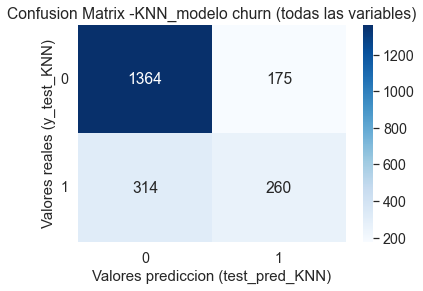

<Figure size 720x504 with 0 Axes>

In [108]:
# se crea la matriz de confusion para el resultado del modelo aplicado al data frame de test y las etiquetas reales
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test_KNN, test_pred_KNN)

# grafica matriz de confusion
matrix_df = pd.DataFrame(confusion_matrix)
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="Blues")
sns.set(font_scale=1.3)
ax.set_title('Confusion Matrix -KNN_modelo churn (todas las variables)')
ax.set_xticklabels(labels)
#ax.set_xticklabels(['']+labels)

ax.set_xlabel("Valores prediccion (test_pred_KNN)", fontsize =15)
ax.set_yticklabels(list(labels), rotation = 0)
ax.set_ylabel("Valores reales (y_test_KNN)", fontsize=15)
plt.show()
                                          

#### Precision, recall, f1-score, accuracy

In [109]:
print(metrics.classification_report(y_test_KNN,test_pred_KNN))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1539
           1       0.60      0.45      0.52       574

    accuracy                           0.77      2113
   macro avg       0.71      0.67      0.68      2113
weighted avg       0.75      0.77      0.76      2113

